In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.6.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import shuffle

#### Load the Dataset 

In [3]:
data=pd.read_csv(r"G:\Localization\211027\labelled_dataset.csv")

In [4]:
data=data[['timestamp', 'acc_x_h', 'acc_y_h', 'acc_z_h', 'acc_x_w', 'acc_y_w','acc_z_w', 'acc_x_c', 'acc_y_c', 'acc_z_c','activity']]

In [5]:
data=data.dropna()

### Balance this data 

In [7]:
data['acc_x_h'] = data['acc_x_h'].astype('float')
data['acc_y_h'] = data['acc_y_h'].astype('float')
data['acc_z_h'] = data['acc_z_h'].astype('float')
data['acc_x_w'] = data['acc_x_w'].astype('float')
data['acc_y_w'] = data['acc_y_w'].astype('float')
data['acc_z_w'] = data['acc_z_w'].astype('float')
data['acc_x_c'] = data['acc_x_c'].astype('float')
data['acc_y_c'] = data['acc_y_c'].astype('float')
data['acc_z_c'] = data['acc_z_c'].astype('float')

In [9]:
Fs = 1
activities = data['activity'].value_counts().index

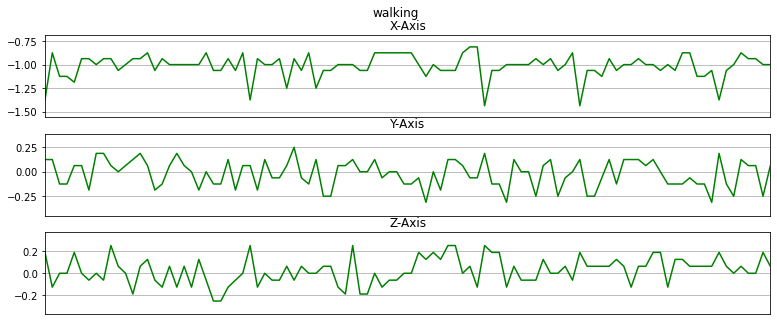

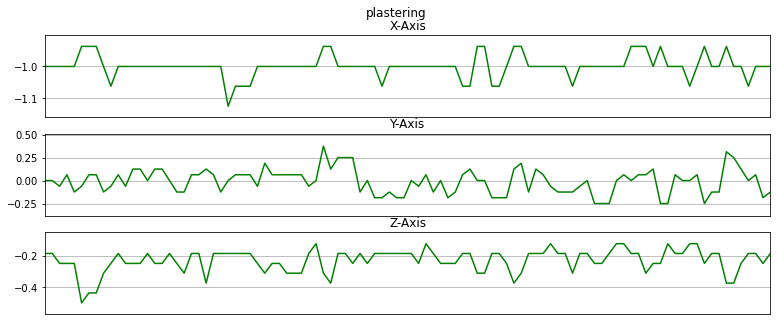

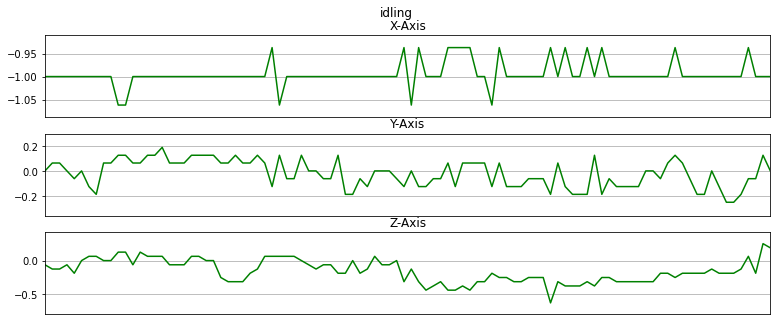

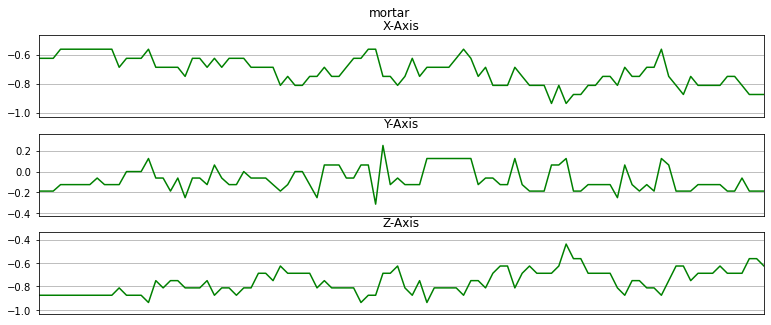

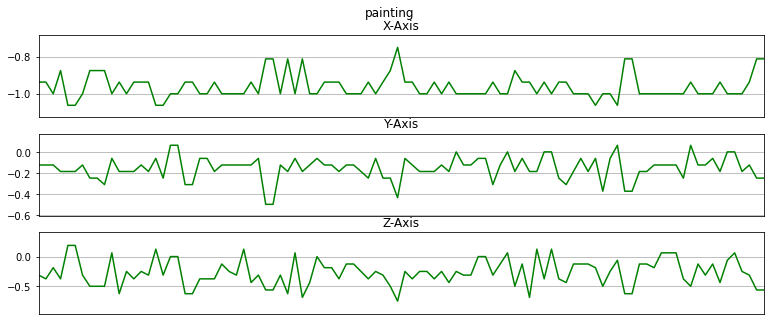

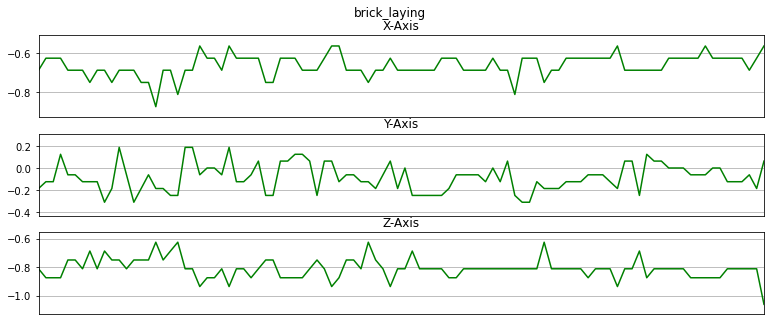

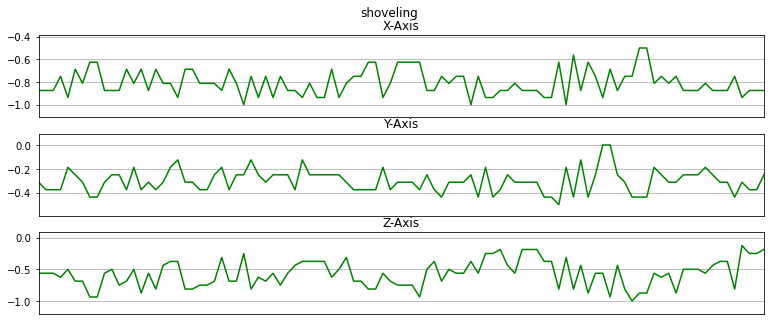

In [10]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(13, 5), sharex=True)
    plot_axis(ax0, data['timestamp'], data['acc_x_h'], 'X-Axis')
    plot_axis(ax1, data['timestamp'], data['acc_y_h'], 'Y-Axis')
    plot_axis(ax2, data['timestamp'], data['acc_z_h'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Fs*100]
    plot_activity(activity, data_for_plot)

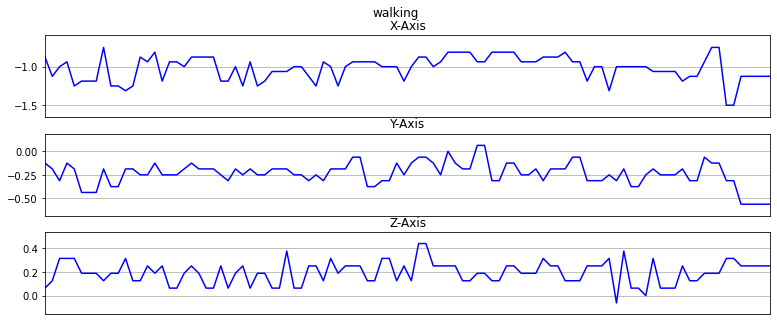

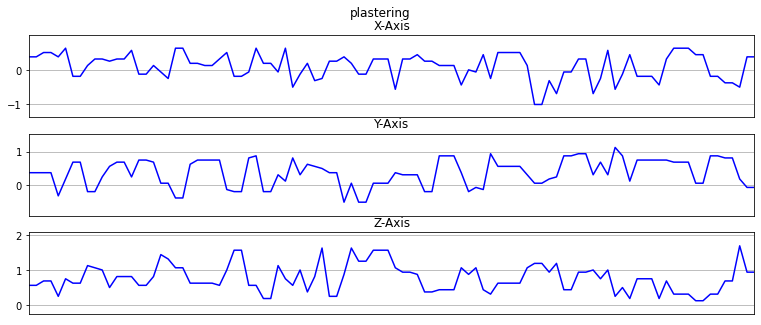

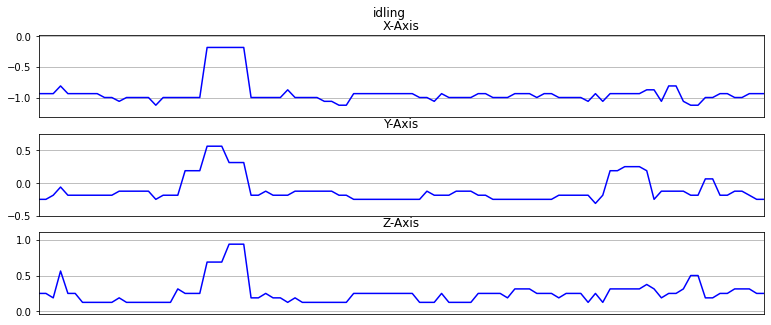

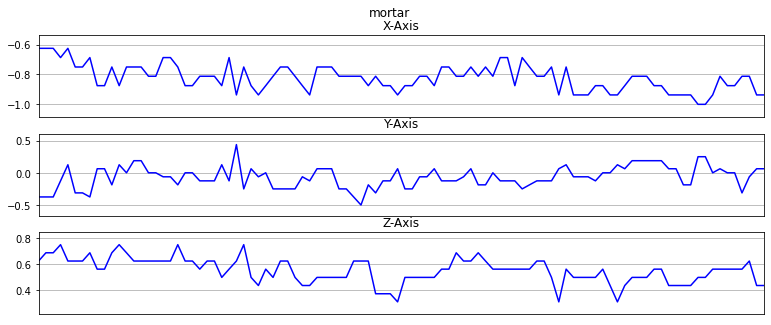

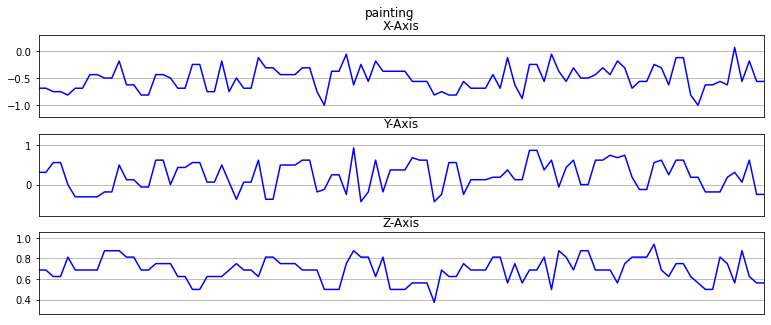

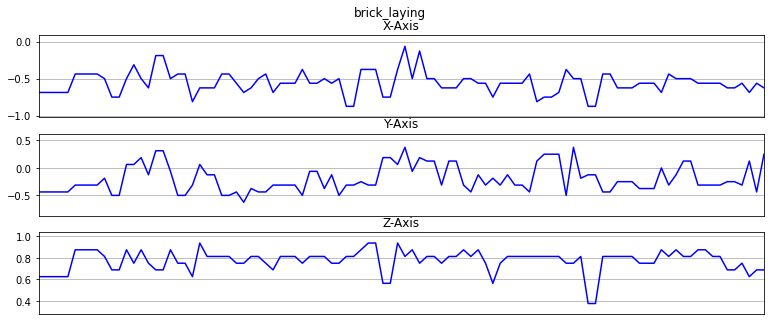

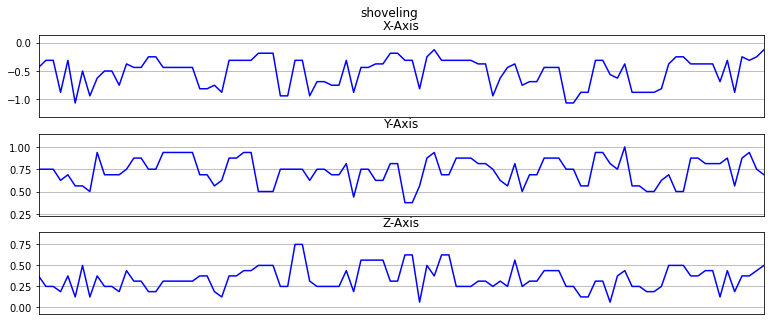

In [11]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(13, 5), sharex=True)
    plot_axis(ax0, data['timestamp'], data['acc_x_w'], 'X-Axis')
    plot_axis(ax1, data['timestamp'], data['acc_y_w'], 'Y-Axis')
    plot_axis(ax2, data['timestamp'], data['acc_z_w'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'b')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Fs*100]
    plot_activity(activity, data_for_plot)

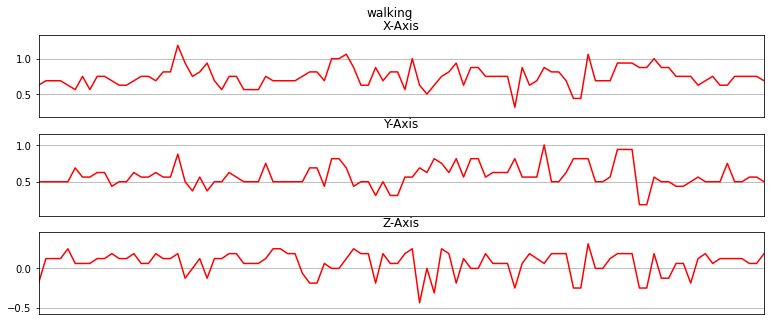

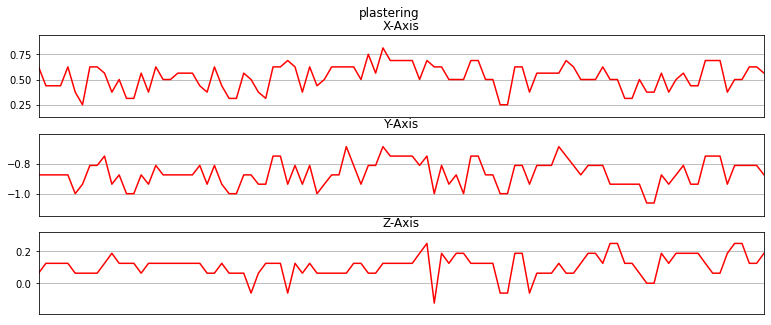

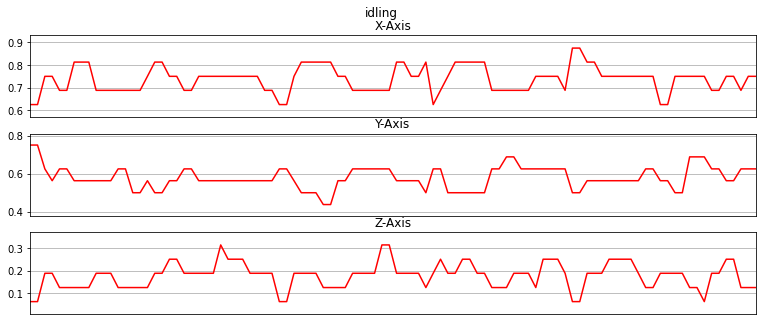

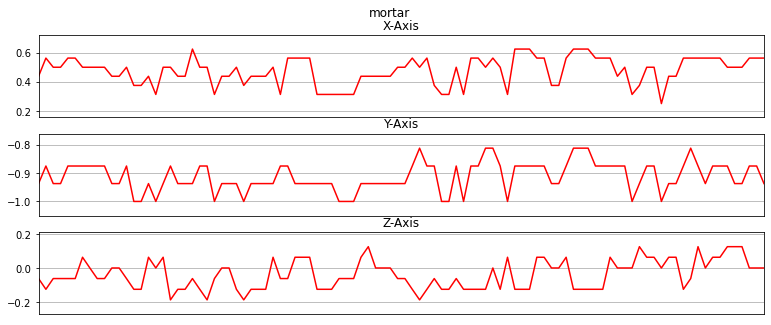

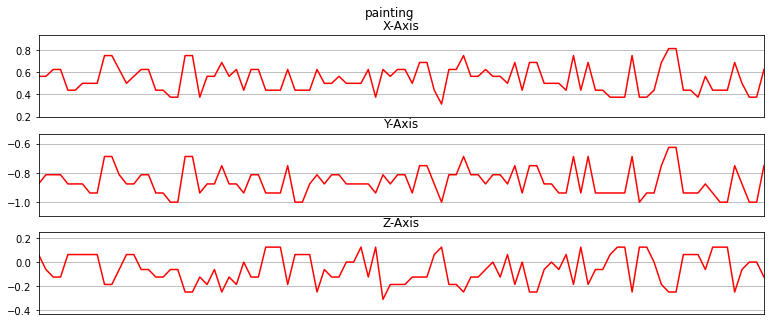

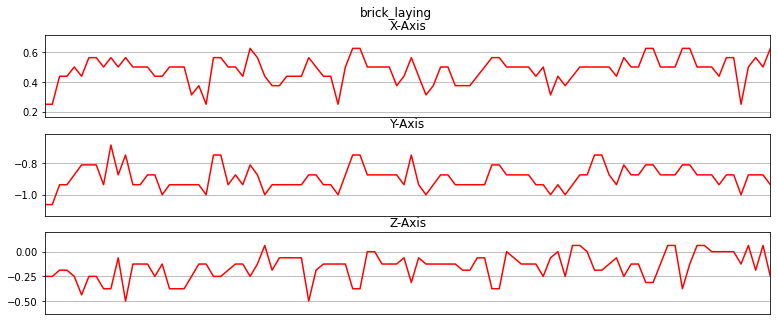

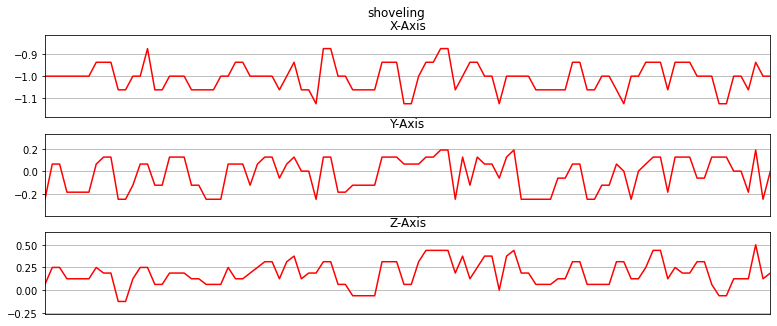

In [12]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(13, 5), sharex=True)
    plot_axis(ax0, data['timestamp'], data['acc_x_c'], 'X-Axis')
    plot_axis(ax1, data['timestamp'], data['acc_y_c'], 'Y-Axis')
    plot_axis(ax2, data['timestamp'], data['acc_z_c'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Fs*100]
    plot_activity(activity, data_for_plot)

In [13]:
df = data.drop(['timestamp'], axis = 1).copy()
df.head()

,acc_x_h,acc_y_h,acc_z_h,acc_x_w,acc_y_w,acc_z_w,acc_x_c,acc_y_c,acc_z_c,activity
0,-1.375,0.125,0.188,-0.875,-0.125,0.063,0.625,0.5,-0.187,walking
1,-0.875,0.125,-0.125,-1.125,-0.187,0.125,0.688,0.5,0.125,walking
2,-1.125,-0.125,0.000,-1.000,-0.312,0.313,0.688,0.5,0.125,walking
3,-1.125,-0.125,0.000,-0.937,-0.125,0.313,0.688,0.5,0.125,walking
4,-1.187,0.063,0.188,-1.250,-0.187,0.313,0.625,0.5,0.250,walking


In [14]:
df['activity'].value_counts()

walking         3032
plastering      2764
idling          2719
mortar          2559
painting        2255
brick_laying    2215
shoveling       1342
Name: activity, dtype: int64

In [15]:
#jogging = df[df['activity']=='jogging'].head(560).copy()
#walking = df[df['activity']=='walking'].head(560).copy()
#idling = df[df['activity']=='idling'].head(560).copy()

idling = df[df['activity']=='idling'].tail(1342).copy()
walking = df[df['activity']=='walking'].tail(1342).copy()


brick_laying = df[df['activity']=='brick_laying'].tail(1127).copy()
plastering = df[df['activity']=='plastering'].head(1127).copy()
mortar = df[df['activity']=='mortar'].tail(1127).copy()
shoveling = df[df['activity']=='shoveling'].tail(1127).copy()
painting = df[df['activity']=='painting'].tail(2255).copy()

others1 = pd.DataFrame()
others1 = others1.append([shoveling,mortar,brick_laying,painting,plastering])
others1 = shuffle(others1).tail(1342)

others = pd.DataFrame()
others = others.append([others1])

others['activity'] = 'others'

others = others[others['activity']=='others'].tail(1127).copy()


value_add_work = pd.DataFrame()
value_add_work = value_add_work.append([painting])
value_add_work = value_add_work.tail(2255)
value_add_work['activity'] = 'value_add_work'


non_value_add_work = pd.DataFrame()
non_value_add_work = non_value_add_work.append([shoveling,mortar,brick_laying,others])
non_value_add_work = non_value_add_work.tail(4510)
non_value_add_work['activity'] = 'non_value_add_work'
non_value_add_work = non_value_add_work[non_value_add_work['activity']=='non_value_add_work'].tail(4510).copy()

In [16]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([idling,walking,value_add_work,non_value_add_work])
balanced_data.shape

(9447, 10)

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data

,acc_x_h,acc_y_h,acc_z_h,acc_x_w,acc_y_w,acc_z_w,acc_x_c,acc_y_c,acc_z_c,activity,label
11041,-0.937,0.063,-0.437,-0.937,0.500,0.125,0.813,0.375,0.313,idling,0
11042,-0.937,0.000,-0.375,-0.875,0.500,0.125,0.813,0.313,0.375,idling,0
11043,-0.937,-0.187,-0.437,-0.875,0.500,0.125,0.813,0.375,0.375,idling,0
11044,-0.937,-0.250,-0.375,-0.875,0.500,0.125,0.813,0.375,0.375,idling,0
11045,-1.000,-0.125,-0.500,-0.875,0.563,0.250,0.875,0.563,0.313,idling,0
...,...,...,...,...,...,...,...,...,...,...,...
15654,-0.625,0.125,-0.875,-0.500,0.563,0.625,-1.062,0.000,0.125,non_value_add_work,1
5702,-0.812,-0.125,-0.625,-0.500,-0.062,0.813,-0.937,0.438,0.188,non_value_add_work,1
8686,-0.750,-0.125,-0.750,-0.687,0.500,0.438,-1.000,0.188,0.250,non_value_add_work,1
4772,-0.875,-0.187,-0.437,0.625,0.438,0.688,-0.875,0.375,0.313,non_value_add_work,1


### Standardized data 

In [23]:
balanced_data['acc_x_h'] = balanced_data['acc_x_h'].diff(1)
balanced_data['acc_y_h'] = balanced_data['acc_y_h'].diff(1)
balanced_data['acc_z_h'] = balanced_data['acc_z_h'].diff(1)
balanced_data['acc_x_w'] = balanced_data['acc_x_w'].diff(1)
balanced_data['acc_y_w'] = balanced_data['acc_y_w'].diff(1)
balanced_data['acc_z_w'] = balanced_data['acc_z_w'].diff(1)
balanced_data['acc_x_c'] = balanced_data['acc_x_c'].diff(1)
balanced_data['acc_y_c'] = balanced_data['acc_y_c'].diff(1)
balanced_data['acc_z_c'] = balanced_data['acc_z_c'].diff(1)

In [24]:
balanced_data = balanced_data.fillna(0)

In [25]:
X = balanced_data.drop(['activity','label'],axis=1)
y = balanced_data['label']

In [26]:

scaled_X = pd.DataFrame(data = X, columns = ['acc_x_h', 'acc_y_h', 'acc_z_h', 'acc_x_w', 'acc_y_w','acc_z_w', 'acc_x_c', 'acc_y_c', 'acc_z_c'])
scaled_X['label'] = y.values

scaled_X

,acc_x_h,acc_y_h,acc_z_h,acc_x_w,acc_y_w,acc_z_w,acc_x_c,acc_y_c,acc_z_c,label
11041,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0
11042,0.000,-0.063,0.062,0.062,0.000,0.000,0.000,-0.062,0.062,0
11043,0.000,-0.187,-0.062,0.000,0.000,0.000,0.000,0.062,0.000,0
11044,0.000,-0.063,0.062,0.000,0.000,0.000,0.000,0.000,0.000,0
11045,-0.063,0.125,-0.125,0.000,0.063,0.125,0.062,0.188,-0.062,0
...,...,...,...,...,...,...,...,...,...,...
15654,-0.125,0.375,0.000,0.312,-0.125,0.062,-0.250,-0.625,0.375,1
5702,-0.187,-0.250,0.250,0.000,-0.625,0.188,0.125,0.438,0.063,1
8686,0.062,0.000,-0.125,-0.187,0.562,-0.375,-0.063,-0.250,0.062,1
4772,-0.125,-0.062,0.313,1.312,-0.062,0.250,0.125,0.187,0.063,1


### Frame Preparation 

In [27]:
import scipy.stats as stats

In [28]:
Fs = 1
frame_size = Fs*4
hop_size = Fs*1

In [29]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 9

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        acc_x_h = df['acc_x_h'].values[i: i + frame_size]
        acc_y_h = df['acc_y_h'].values[i: i + frame_size]
        acc_z_h = df['acc_z_h'].values[i: i + frame_size]
        acc_x_w = df['acc_x_w'].values[i: i + frame_size]
        acc_y_w = df['acc_y_w'].values[i: i + frame_size]
        acc_z_w = df['acc_z_w'].values[i: i + frame_size]
        acc_x_c = df['acc_x_c'].values[i: i + frame_size]
        acc_y_c = df['acc_y_c'].values[i: i + frame_size]
        acc_z_c = df['acc_z_c'].values[i: i + frame_size]
        
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([acc_x_h, acc_y_h, acc_z_h,acc_x_w, acc_y_w, acc_z_w,acc_x_c,acc_y_c,acc_z_c])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames)
    labels = np.asarray(labels)

    return frames, labels

In [30]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [31]:
X.shape, y.shape

((9443, 9, 4), (9443,))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0, stratify = y)

In [33]:
X_train.shape

(8498, 9, 4)

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [35]:
import pickle
scalerfile = 'scaler_Dec_painter.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [36]:
X_train.shape, X_test.shape

((8498, 9, 4), (945, 9, 4))

In [37]:
X_train[0].shape, X_test[0].shape

((9, 4), (9, 4))

In [39]:
X_train = X_train.reshape(8498, 9, 4,1)
X_test = X_test.reshape(945, 9, 4,1)

In [40]:
X_train[0].shape, X_test[0].shape

((9, 4, 1), (9, 4, 1))

In [41]:
label.classes_

array(['idling', 'non_value_add_work', 'value_add_work', 'walking'],
      dtype=object)

In [42]:
X_train.shape

(8498, 9, 4, 1)

In [43]:
X_train.min()

-8.24701907983162

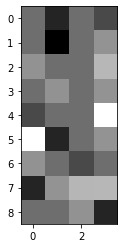

In [44]:
plt.imshow(X_train[9],cmap='gray')
#plt.savefig('walking.png',dpi=300)

### 2D CNN Model 

In [45]:
model = Sequential()
model.add(Conv2D(32, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.2))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))


model.add(Dense(4, activation='softmax'))

model.compile(optimizer=Adam(learning_rate = 0.001),
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [46]:
history = model.fit(X_train, y_train,epochs = 50, validation_data= (X_test, y_test), verbose=1)

Epoch 1/50
266/266 [==============================] - 2s 5ms/step - loss: 0.9488 - accuracy: 0.6023 - val_loss: 0.7053 - val_accuracy: 0.7005
Epoch 2/50
266/266 [==============================] - 1s 3ms/step - loss: 0.7087 - accuracy: 0.7109 - val_loss: 0.5806 - val_accuracy: 0.7587
Epoch 3/50
266/266 [==============================] - 1s 4ms/step - loss: 0.6372 - accuracy: 0.7410 - val_loss: 0.5347 - val_accuracy: 0.7725
Epoch 4/50
266/266 [==============================] - 1s 4ms/step - loss: 0.5862 - accuracy: 0.7643 - val_loss: 0.4919 - val_accuracy: 0.7958
Epoch 5/50
266/266 [==============================] - 1s 3ms/step - loss: 0.5498 - accuracy: 0.7832 - val_loss: 0.4887 - val_accuracy: 0.8074
Epoch 6/50
266/266 [==============================] - 1s 4ms/step - loss: 0.5367 - accuracy: 0.7817 - val_loss: 0.4510 - val_accuracy: 0.8201
Epoch 7/50
266/266 [==============================] - 1s 3ms/step - loss: 0.5206 - accuracy: 0.7936 - val_loss: 0.4520 - val_accuracy: 0.8243
Epoch 

In [47]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

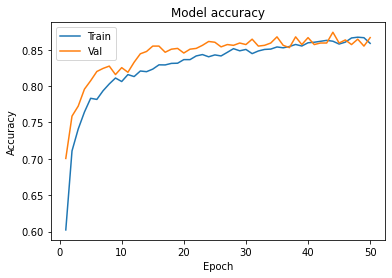

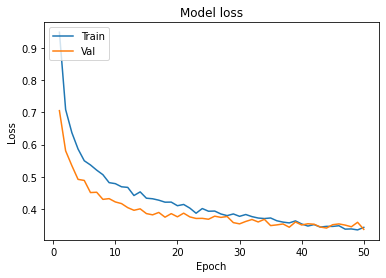

In [48]:
plot_learningCurve(history,50)

### Confusion Matrix 

In [49]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report

In [50]:
y_pred = model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

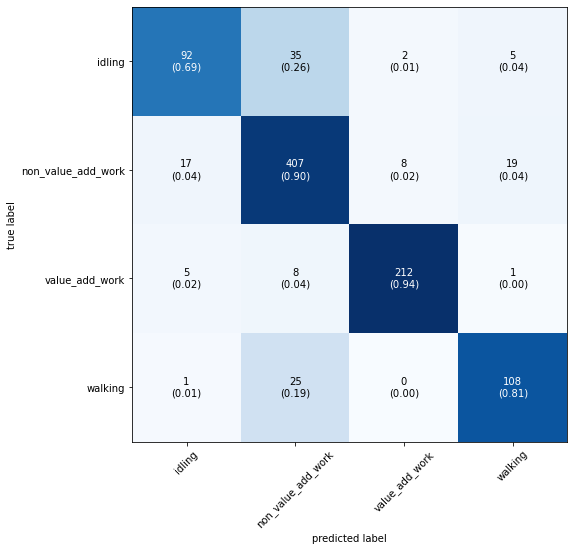

In [51]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(8,8))

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       134
           1       0.86      0.90      0.88       451
           2       0.95      0.94      0.95       226
           3       0.81      0.81      0.81       134

    accuracy                           0.87       945
   macro avg       0.86      0.83      0.84       945
weighted avg       0.87      0.87      0.87       945

